___
<h1> Machine Learning </h1>
<h2> M. Sc. in Electrical and Computer Engineering </h2>
<h3> Instituto Superior de Engenharia / Universidade do Algarve </h3>

[MEEC](https://ise.ualg.pt/en/curso/1477) / [ISE](https://ise.ualg.pt) / [UAlg](https://www.ualg.pt)

Pedro J. S. Cardoso (pcardoso@ualg.pt)
___

# Feature engineering

Feature engineering is the process of using domain knowledge to extract features from raw data via data mining techniques. These features can be used to improve the performance of machine learning algorithms. Feature engineering can be considered as applied machine learning itself. Examples of feature engineering include:
- deriving new features from existing data,
- selecting only the most relevant features,
- creating features from images, text, and sensor data,
- normalizing numerical features,
- encoding categorical features,
- transforming features into a more suitable format for machine learning algorithms.
- ...

In this notebook, we will explore some of these techniques. For that, let us consider the Seoul Bike Sharing Demand dataset. The dataset contains the hourly count of rental bikes between years 2017 and 2018 in Seoul, Korea with the corresponding weather and seasonal information. The dataset can be downloaded from https://archive.ics.uci.edu/dataset/560/seoul+bike+sharing+demand but we have already downloaded it and saved it in the `data` folder.

So, we can start by loading the dataset into a pandas dataframe. 


In [6]:
import pandas as pd
df = pd.read_csv('./data/SeoulBikeData.csv')
df.head()

,Date,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


By calling the dataframe's `info` method, we can see that there are no missing values but there are some categorical columns.
(For treating missing values, please refer to the `19-Missing-Data.ipynb` notebook were some techiniques are studied.)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Date                      8760 non-null   object 
 1   Rented Bike Count         8760 non-null   int64  
 2   Hour                      8760 non-null   int64  
 3   Temperature(C)            8760 non-null   float64
 4   Humidity(%)               8760 non-null   int64  
 5   Wind speed (m/s)          8760 non-null   float64
 6   Visibility (10m)          8760 non-null   int64  
 7   Dew point temperature(C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)   8760 non-null   float64
 9   Rainfall(mm)              8760 non-null   float64
 10  Snowfall (cm)             8760 non-null   float64
 11  Seasons                   8760 non-null   object 
 12  Holiday                   8760 non-null   object 
 13  Functioning Day           8760 non-null   object 
dtypes: float

## Categorical data transformation

Most machine learning algorithms cannot handle categorical data. Therefore, categorical data must be transformed into numerical data. There are several ways to do this, like:
- One-hot encoding -- transform each category into a binary column
- Ordinal encoding -- transform each category into a number
- Binary encoding -- transform each category into a binary number
- Hash encoding -- transform each category into a hash number
- ...

Let us see how to performe the first two techniques.

### One hot encoding

One hot encoding is a technique used to transform categorical features to binary features. The idea is to create a new column for each category and assign a 1 or 0 to the column. For example, the season column has four categories: Spring, Summer, Autumn, and Winter. We can convert this column into four columns, one for each category, and use 0 or 1 to indicate if the sample belongs to that category or not. To achieve this, we can use the pandas get_dummies method (we'll do it for the 'Holiday' and 'Functioning Day' columns).

In [8]:
df = pd.get_dummies(df, columns=['Holiday', 'Functioning Day'], drop_first=True)
df.head()

,Date,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday_No Holiday,Functioning Day_Yes
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,True,True
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,True,True
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,True,True
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,True,True
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,True,True


### Ordinal encoding
Ordinal encoding is a technique used to transform categorical features to ordinal features. The idea is to assign a number to each category. For example, the season column has four categories: Spring, Summer, Autumn, and Winter. We can convert this column into a single column with values 1, 2, 3, and 4. To achieve this, we can use the pandas replace method.

In [10]:
df['Seasons'] = df['Seasons'].replace({'Spring': 1, 'Summer': 2, 'Autumn': 3, 'Winter': 4})
df.head()

,Date,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday_No Holiday,Functioning Day_Yes
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,4,True,True
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,4,True,True
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,4,True,True
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,4,True,True
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,4,True,True


## Dates transformation

Dates are usually represented as strings. However, machine learning algorithms cannot handle strings. Therefore, dates must be transformed into numerical data. There are several ways to do this, like extracting the year, month, day, day of week etc. from the date

In our case, we can split this column into two columns: month and day, and day of week. To achieve this, we can use the pandas to_datetime method as follows:

In [11]:
# make sure the date column is in datetime format
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')

# create new columns for month, day, and day of week
df['month'] = df['Date'].dt.month
df['day'] = df['Date'].dt.day
df['day_of_week'] = df['Date'].dt.day_of_week

# drop the original date column
df.drop('Date', axis=1, inplace=True)

Let us now recheck the dataframe's info method.

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Rented Bike Count         8760 non-null   int64  
 1   Hour                      8760 non-null   int64  
 2   Temperature(C)            8760 non-null   float64
 3   Humidity(%)               8760 non-null   int64  
 4   Wind speed (m/s)          8760 non-null   float64
 5   Visibility (10m)          8760 non-null   int64  
 6   Dew point temperature(C)  8760 non-null   float64
 7   Solar Radiation (MJ/m2)   8760 non-null   float64
 8   Rainfall(mm)              8760 non-null   float64
 9   Snowfall (cm)             8760 non-null   float64
 10  Seasons                   8760 non-null   int64  
 11  Holiday_No Holiday        8760 non-null   bool   
 12  Functioning Day_Yes       8760 non-null   bool   
 13  month                     8760 non-null   int32  
 14  day     

We should be now able to apply machine learning algorithms to this dataset. However, we can still improve the performance of the algorithms by applying some feature engineering techniques. But let us see how the algorithms perform without any feature engineering.

In [13]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import NuSVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
import matplotlib.pyplot as plt

def get_X_and_y(df):
    """ Returns the features and the target variable"""
    X = df.drop(['Rented Bike Count'], axis=1)
    y = df['Rented Bike Count']
    return X, y

def run(df):
    """ Runs the models (LinearRegression, Ridge, Lasso, SVR, KNeighborsRegressor, RandomForestRegressor, MLPRegressor) 
    and returns the scores"""
    # get X and y
    X, y = get_X_and_y(df)
    
    # split the data into train and test sets
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, shuffle=True)

    models = {
        'LinearRegression': LinearRegression(),
        'Ridge': Ridge(),
        'Lasso': Lasso(),
        'SVR': NuSVR(),
        'KNeighborsRegressor': KNeighborsRegressor(),
        'RandomForestRegressor': RandomForestRegressor(),
        'MLPRegressor': MLPRegressor(max_iter=10000)
    }
 
    fig, ax = plt.subplots(len(models), 1, figsize=(10, 40))
    scores = {}
    for idx, (name, model) in enumerate(models.items()):
        model.fit(X_train, y_train)
        score = model.score(X_test, y_test)
        pred = model.predict(X_test)
        print(f'{name}: score = {score}')

        # plot pred vs actual
        ax[idx].plot(y_test.values, pred, c='g', marker='o', linestyle='None')
        ax[idx].plot(y_test.values, y_test.values, c='r')
        ax[idx].set_ylabel('Predicted')
        ax[idx].set_xlabel('Actual')
        ax[idx].set_title(f'{name} / Score =  {score}')   
        
        scores[name] = score
    
    return scores 

Let us run the models without any extra feature engineering

LinearRegression: score = 0.5200512480890536
Ridge: score = 0.5201094221817084
Lasso: score = 0.5204883781115583
SVR: score = 0.012313869492829865
KNeighborsRegressor: score = 0.5202724400286041
RandomForestRegressor: score = 0.9238257744329341
MLPRegressor: score = 0.6708184713088765


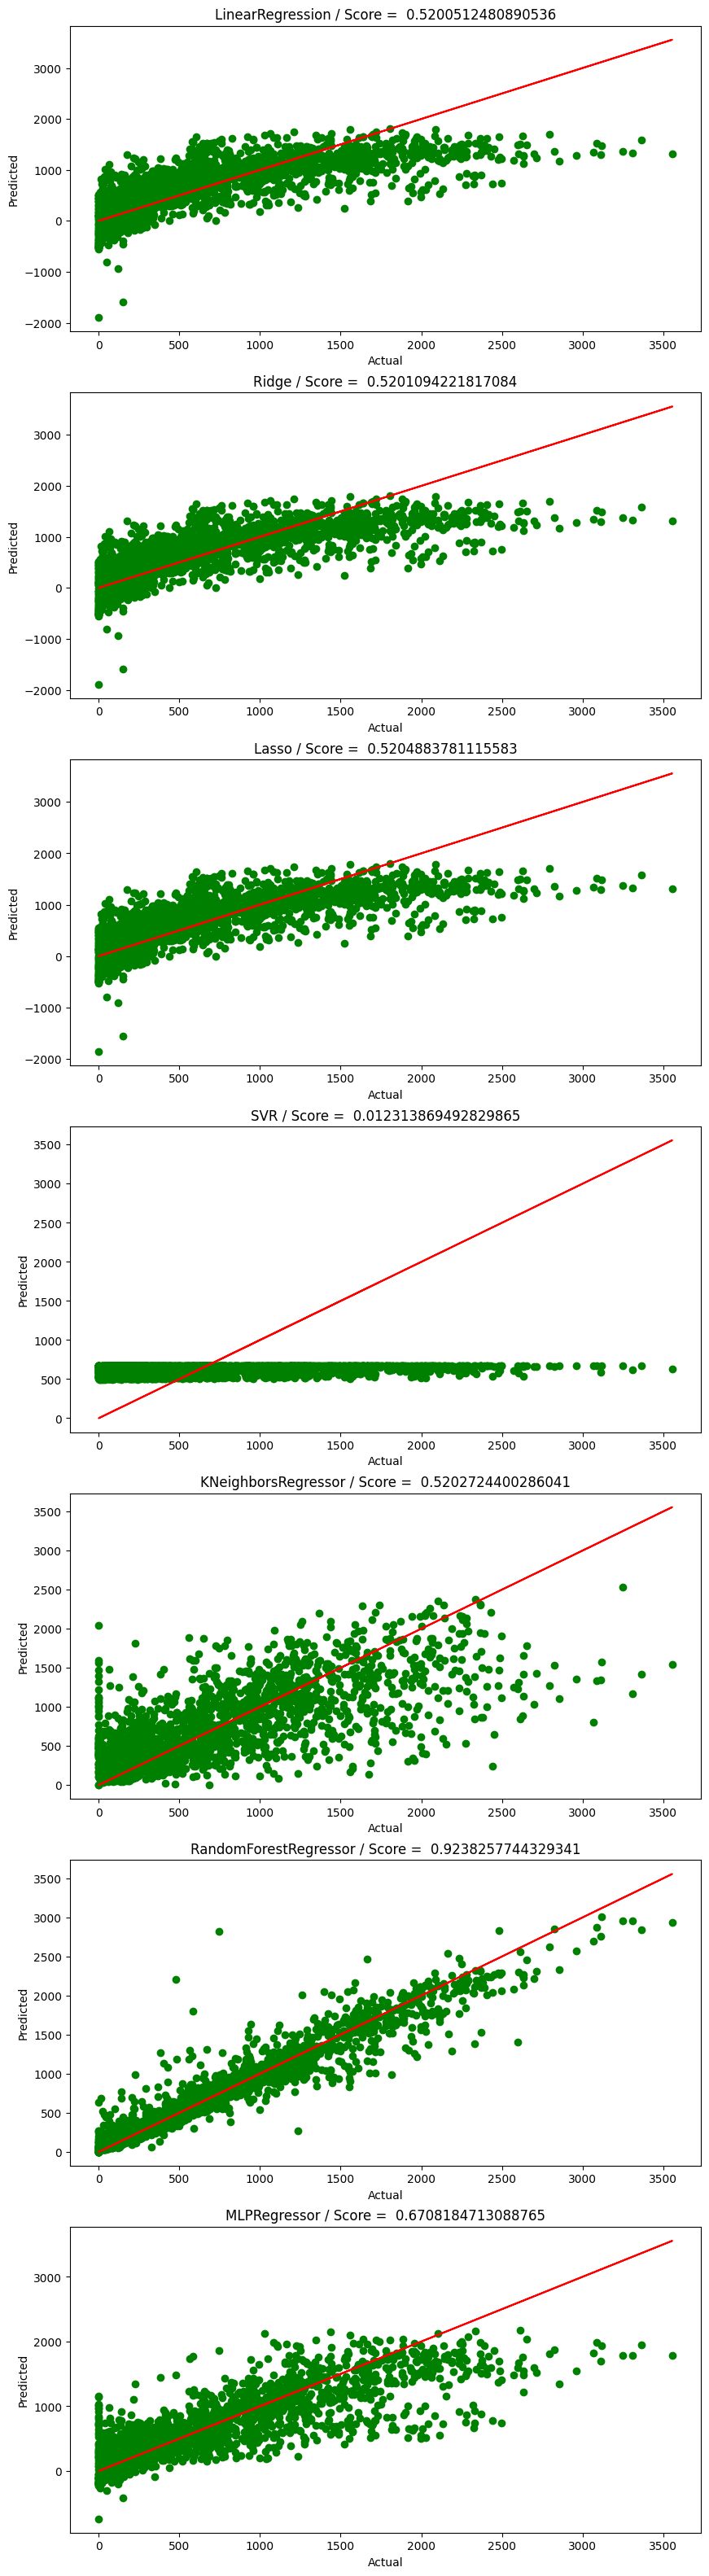

In [14]:
all_scores = pd.DataFrame()
all_scores['without scaling or poly'] = run(df)


## Feature scaling
Feature scaling is the process of transforming numerical features to a common scale. There are several ways to do this, like:
- Normalization -- transform each feature to a range between 0 and 1
- Standardization -- transform each feature to a normal distribution with mean 0 and standard deviation 1
- ...

The original dataset has the following distribution

In [15]:
df.describe()

,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,month,day,day_of_week
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068,2.490411,6.526027,15.720548,3.002740
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746,1.116831,3.448048,8.796749,1.998056
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000,1.000000,4.000000,8.000000,1.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000,2.000000,7.000000,16.000000,3.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000,3.000000,10.000000,23.000000,5.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000,4.000000,12.000000,31.000000,6.000000


Box plots also help with visualization of the distribution

<Axes: >

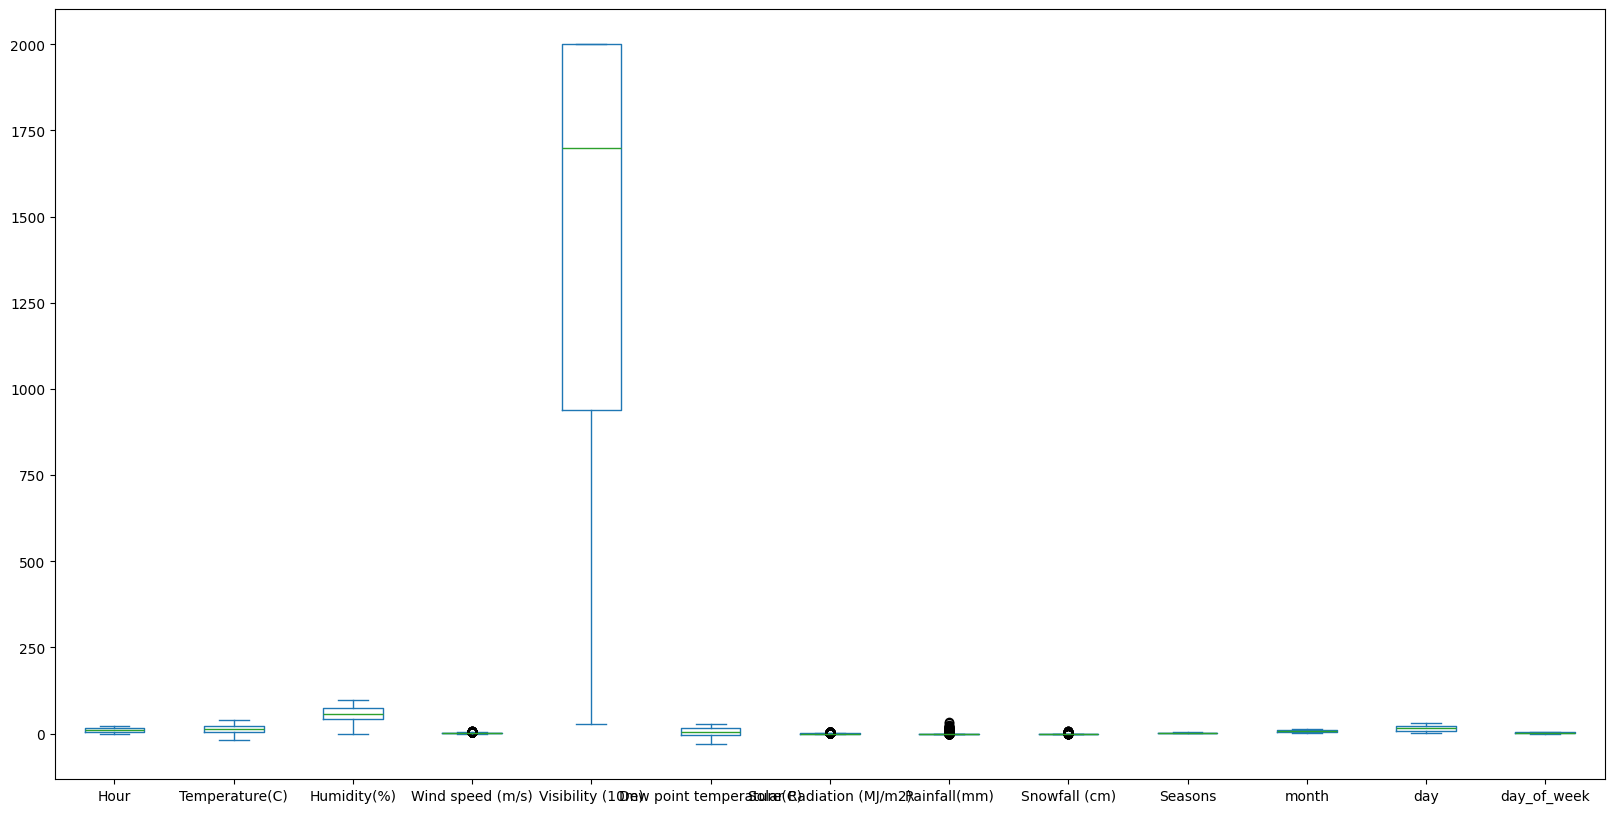

In [16]:
df.drop(['Rented Bike Count'], axis=1).plot(kind='box', figsize=(20,10))

### Standardization (or Z-score normalization)

Standardization is a technique used to transform numerical features to a normal distribution with mean 0 and standard deviation 1. The idea is to subtract the mean and divide by the standard deviation. The formula is given by
$$ X'_{ij} = \frac{X_{ij}-\mu_j}{\sigma_j}$$
where $X_{ij}$ is the observation $i$ for the feature $j$, $\mu_j$ is the mean and $\sigma_j$ is the standard deviation.


To achieve this, we can use the pandas mean and std methods or call the sklearn StandardScaler method.

Let us now apply the standardization technique

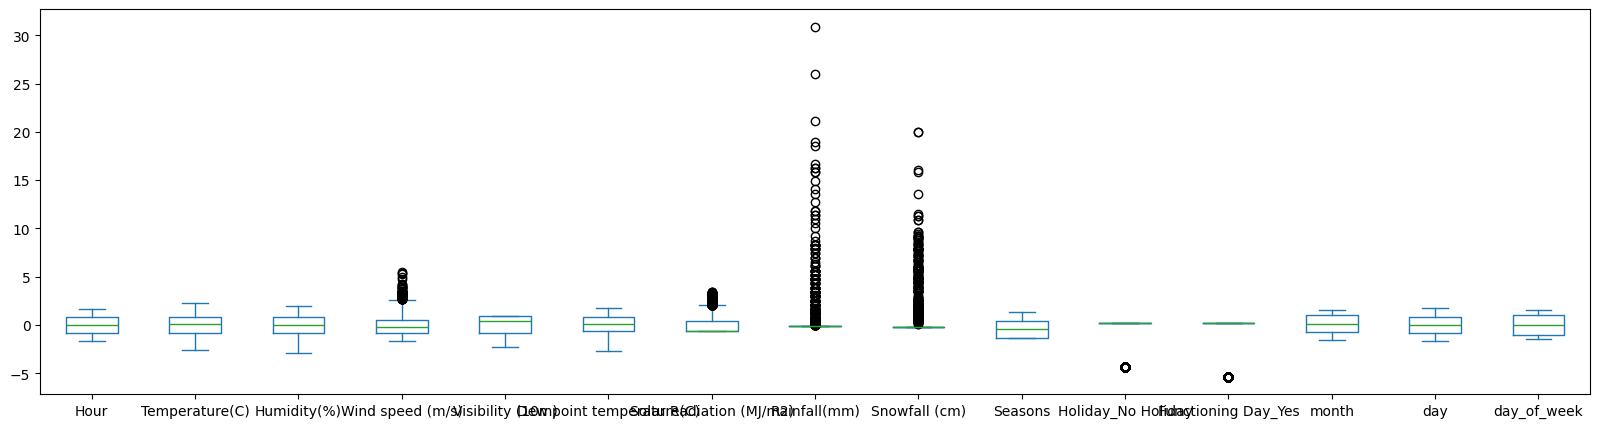

In [17]:
from sklearn.preprocessing import StandardScaler

# get X and y
X, y = get_X_and_y(df)

# set and fit the scaler
standard_scaler = StandardScaler().fit(X)

# normalize the data
df_std = pd.DataFrame(standard_scaler.transform(X), columns = X.columns)
df_std.plot(kind='box', figsize=(20,5))

df_std['Rented Bike Count'] = y

So, let us create a model but now using the standarderized data

LinearRegression: score = 0.5200512480890536
Ridge: score = 0.5200556989169782
Lasso: score = 0.5202168541725438
SVR: score = 0.30245252261375377
KNeighborsRegressor: score = 0.7702100347515076
RandomForestRegressor: score = 0.9234899120617377
MLPRegressor: score = 0.8103026789133313


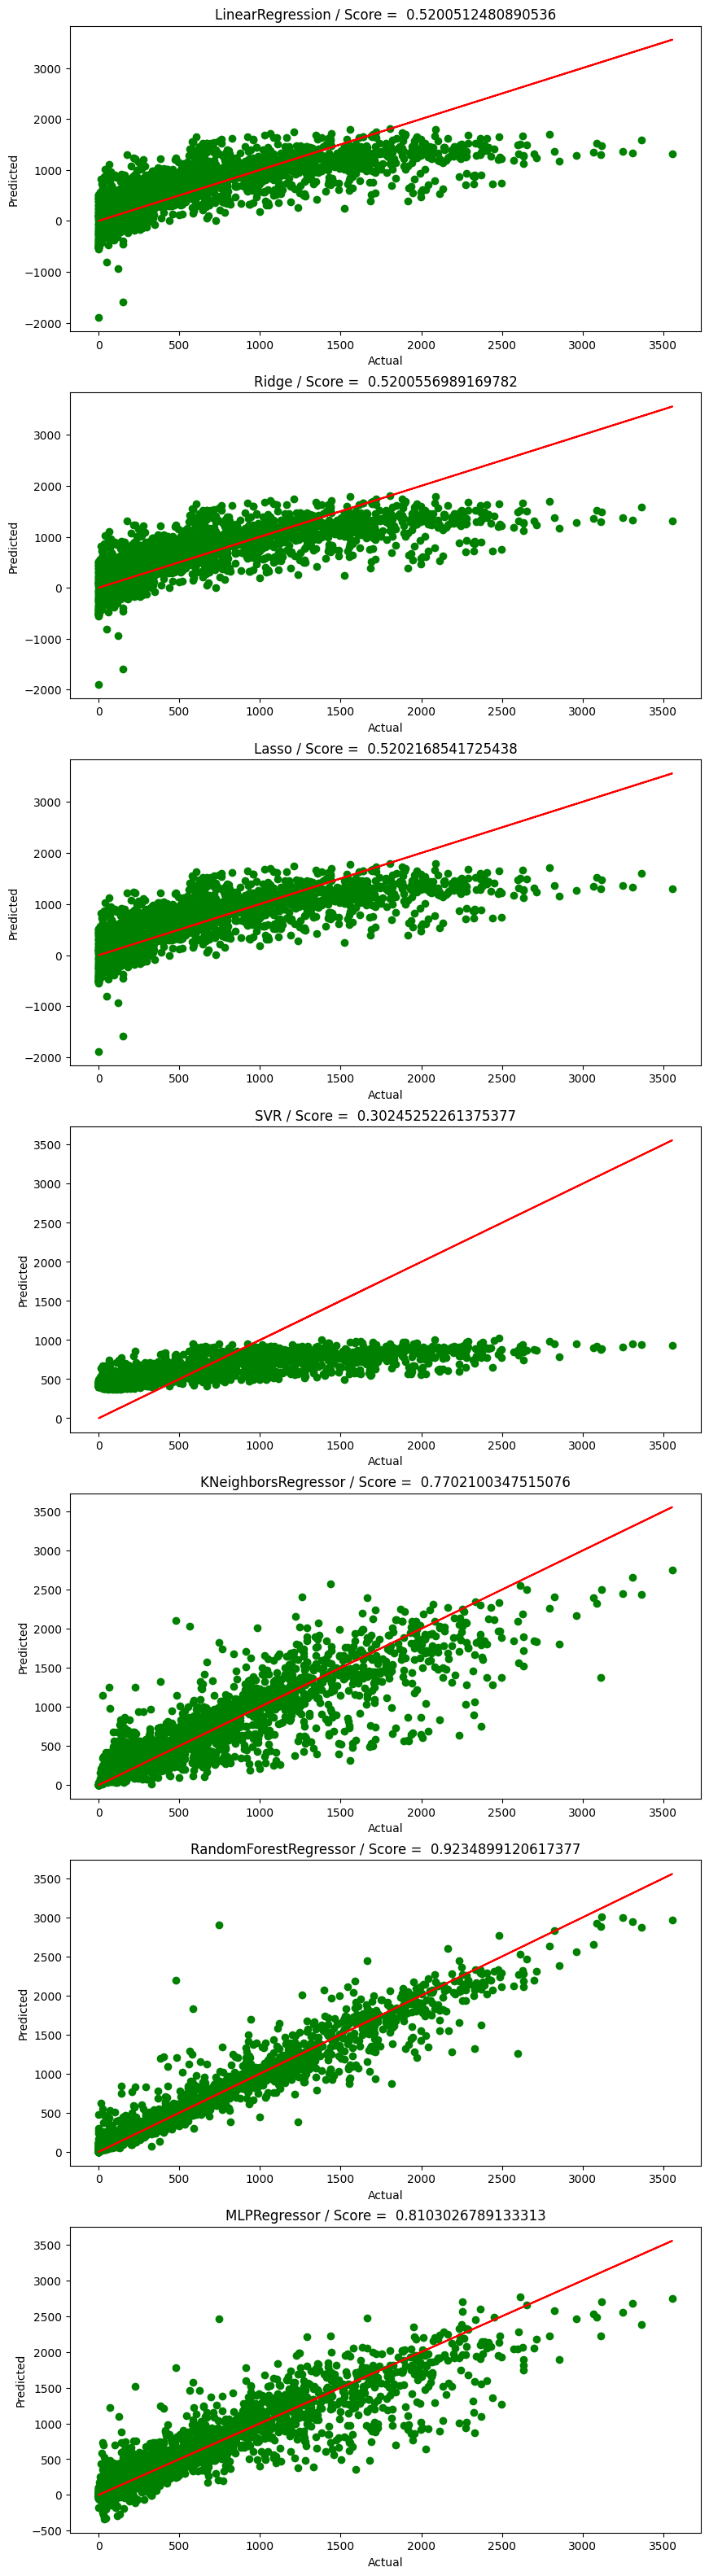

In [18]:
all_scores['with standardization'] =  run(df_std)

### MinMaxScaler

Another usual solution is to normalize the distribution by subtracting the minimum and dividing by the difference between the maximum and the minimum,

$$ X'_{ij} = \frac{X_{ij}-\min_j}{\max_j-\min_j}$$

where X_{ij} is the observation $i$ for the feature $j$, $\min_j$ is the minimum and $\max_j$ is the maximum. Returned values are in the range [0, 1].

This can be done by coding or simply using sklearn

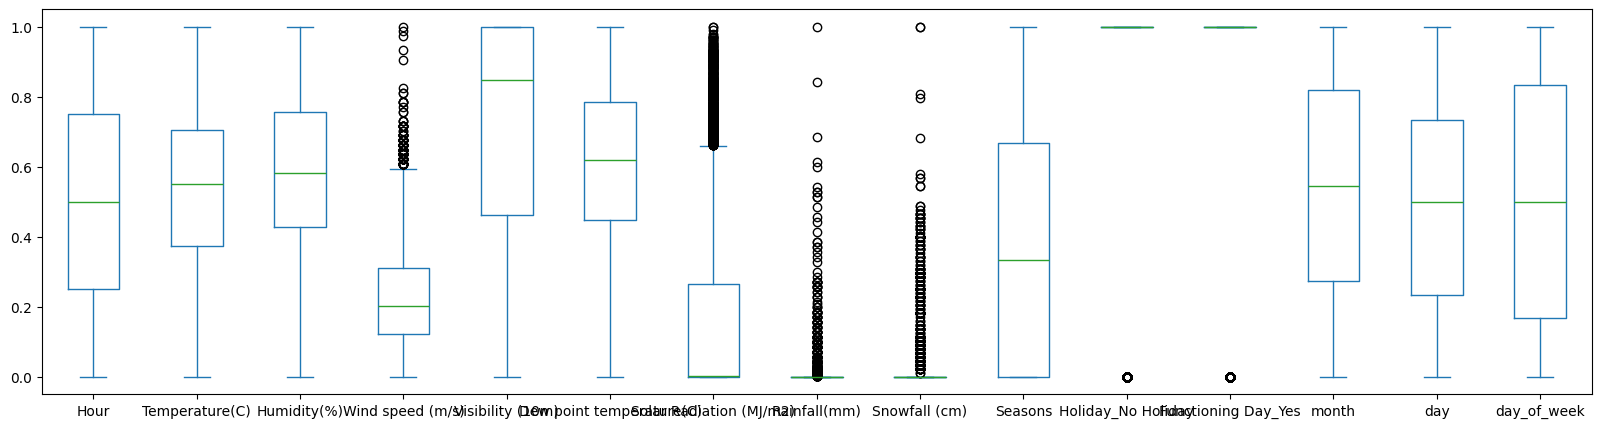

In [19]:
from sklearn.preprocessing import MinMaxScaler

X, y = get_X_and_y(df)

# set and fit the scaler
minmax_scaler = MinMaxScaler().fit(X)

df_minmax = pd.DataFrame(minmax_scaler.transform(X), columns = X.columns)
df_minmax.plot(kind='box', figsize=(20,5))

df_minmax['Rented Bike Count'] = y

So, let us create a model but now using the scaled data 

LinearRegression: score = 0.5200512480890535
Ridge: score = 0.5220761946913552
Lasso: score = 0.5213547063425155
SVR: score = 0.25307627602000526
KNeighborsRegressor: score = 0.7722445779511049
RandomForestRegressor: score = 0.9189472349100479
MLPRegressor: score = 0.7487786721444906


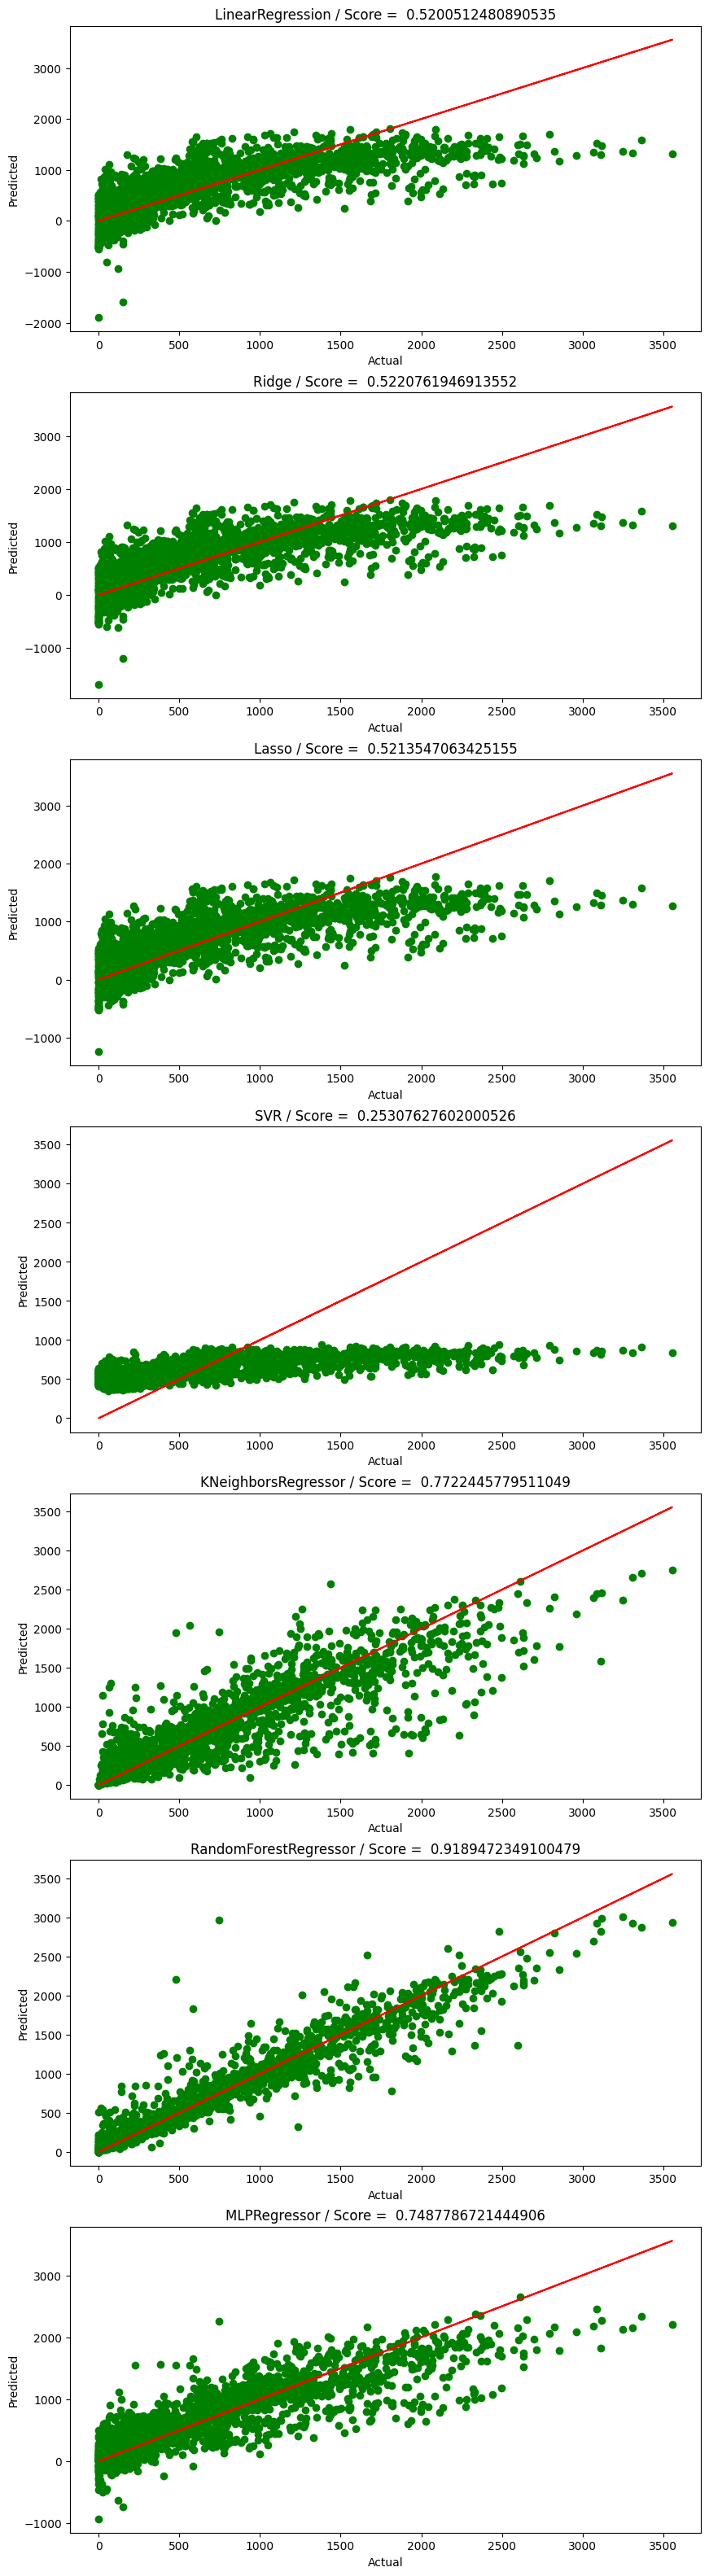

In [20]:
all_scores['with minmax'] = run(df_minmax)

## Polynomial features

Other approach is to create polynomial features. In this case, if the original set of feature is $(x_1, x_2, x_n)$ then the polynomial features with degree 2 are $(1, x_1, x_2, x_n, x_1^2, x_1x_2, x_1x_n, x_2^2, x_2x_n, ...,  x_n^2 \ldots)$.

This can be done by coding or simply using sklearn

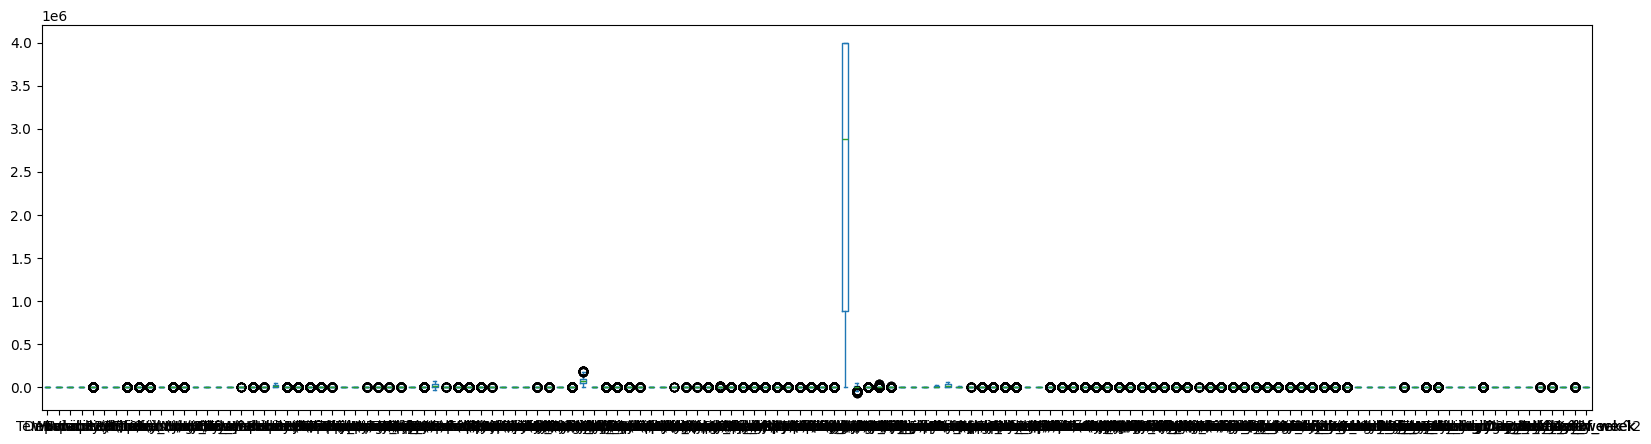

In [21]:
from sklearn.preprocessing import PolynomialFeatures

X, y = get_X_and_y(df)

# set and fit the scaler
poly = PolynomialFeatures(degree=2).fit(X)

df_poly = pd.DataFrame(poly.transform(X), columns = poly.get_feature_names_out(X.columns))

df_poly.plot(kind='box', figsize=(20,5))

df_poly['Rented Bike Count'] = y

Train a model using the polynomial features

LinearRegression: score = 0.660486671550925
Ridge: score = 0.6555810770565551


/Users/pcardoso/anaconda3/envs/AprendizagemAutomatica/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=5.79159e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/Users/pcardoso/anaconda3/envs/AprendizagemAutomatica/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.087e+08, tolerance: 2.748e+05
  model = cd_fast.enet_coordinate_descent(


Lasso: score = 0.6529324042793518
SVR: score = 0.008739583242802329
KNeighborsRegressor: score = 0.49357452312850314
RandomForestRegressor: score = 0.9214259547170822
MLPRegressor: score = 0.4220671060178772


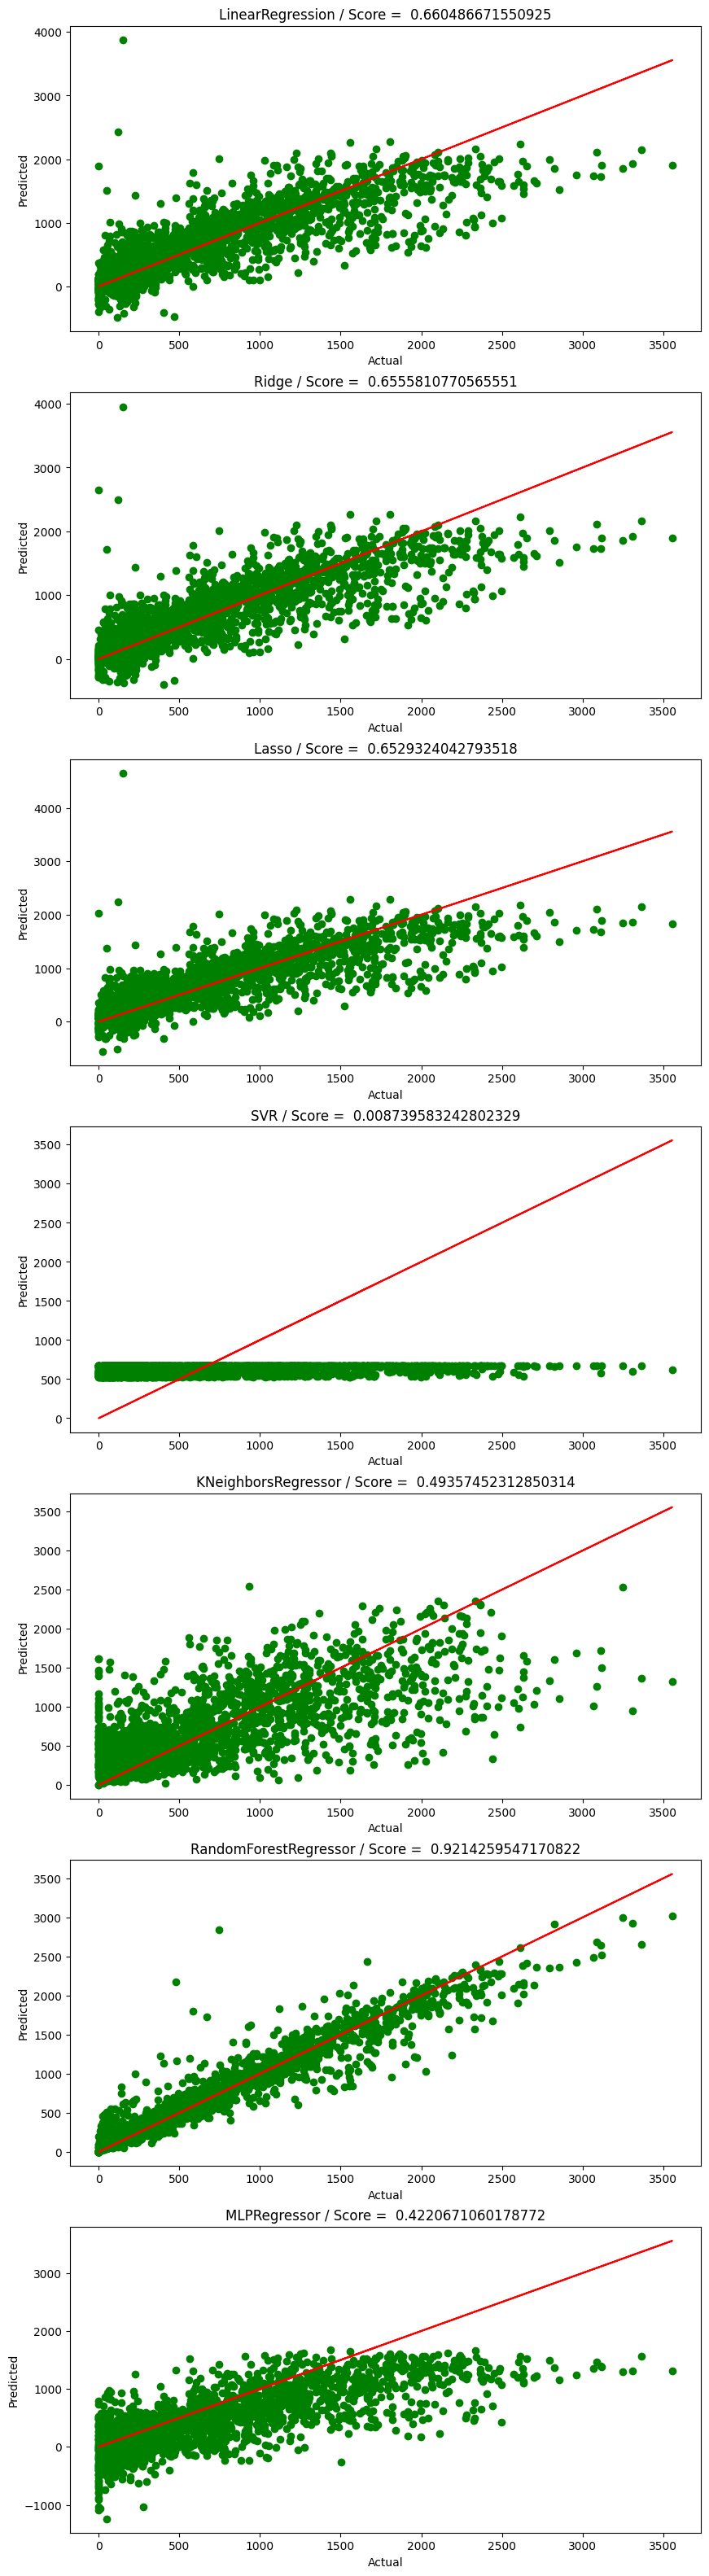

In [22]:
all_scores['with poly'] = run(df_poly)

## Normalization + Polynomial features

Now, let us combine both normalization and polynomial features

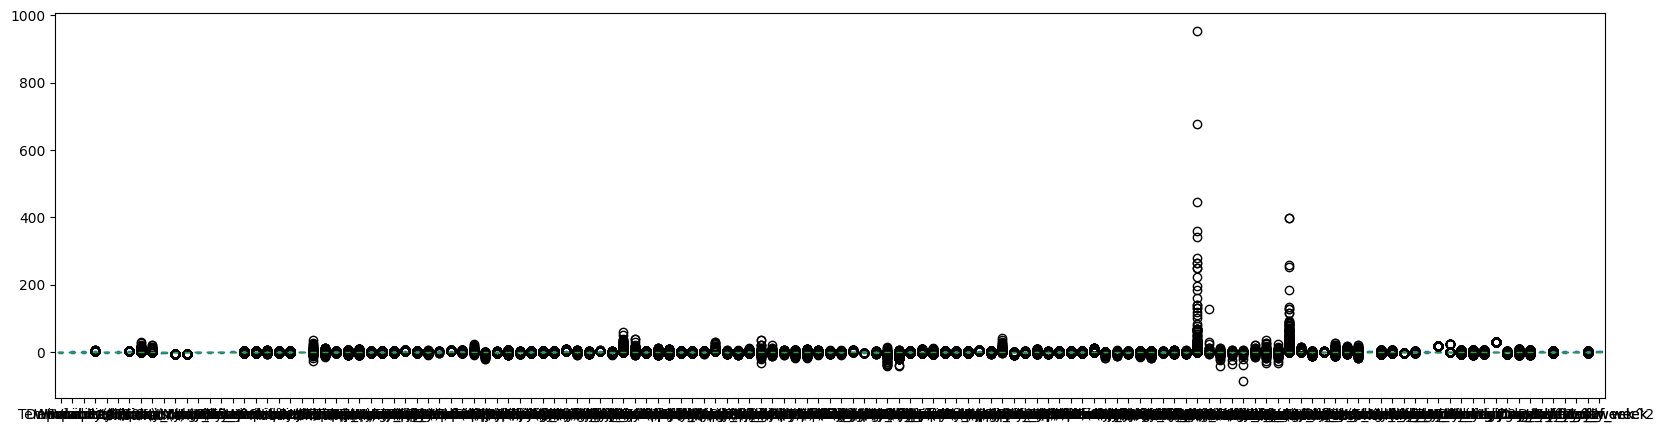

In [17]:
# get X and y
X, y = get_X_and_y(df)

# set and fit the scaler
standard_scaler = StandardScaler().fit(X)

# normalize the data
df_std = pd.DataFrame(standard_scaler.transform(X), columns = X.columns)

# set and fit the scaler
poly = PolynomialFeatures(degree=2, include_bias=False).fit(df_std)

df_std_poly = pd.DataFrame(poly.transform(df_std), columns = poly.get_feature_names_out(df_std.columns))

df_std_poly.plot(kind='box', figsize=(20,5))

df_std_poly['Rented Bike Count'] = y

And run the model

LinearRegression: score = 0.6606047632916372
Ridge: score = 0.6569256021049072
Lasso: score = 0.6543949696175837
SVR: score = 0.12151163072616278
KNeighborsRegressor: score = 0.7798896630694611
RandomForestRegressor: score = 0.919262456297215
MLPRegressor: score = 0.8009548495845829


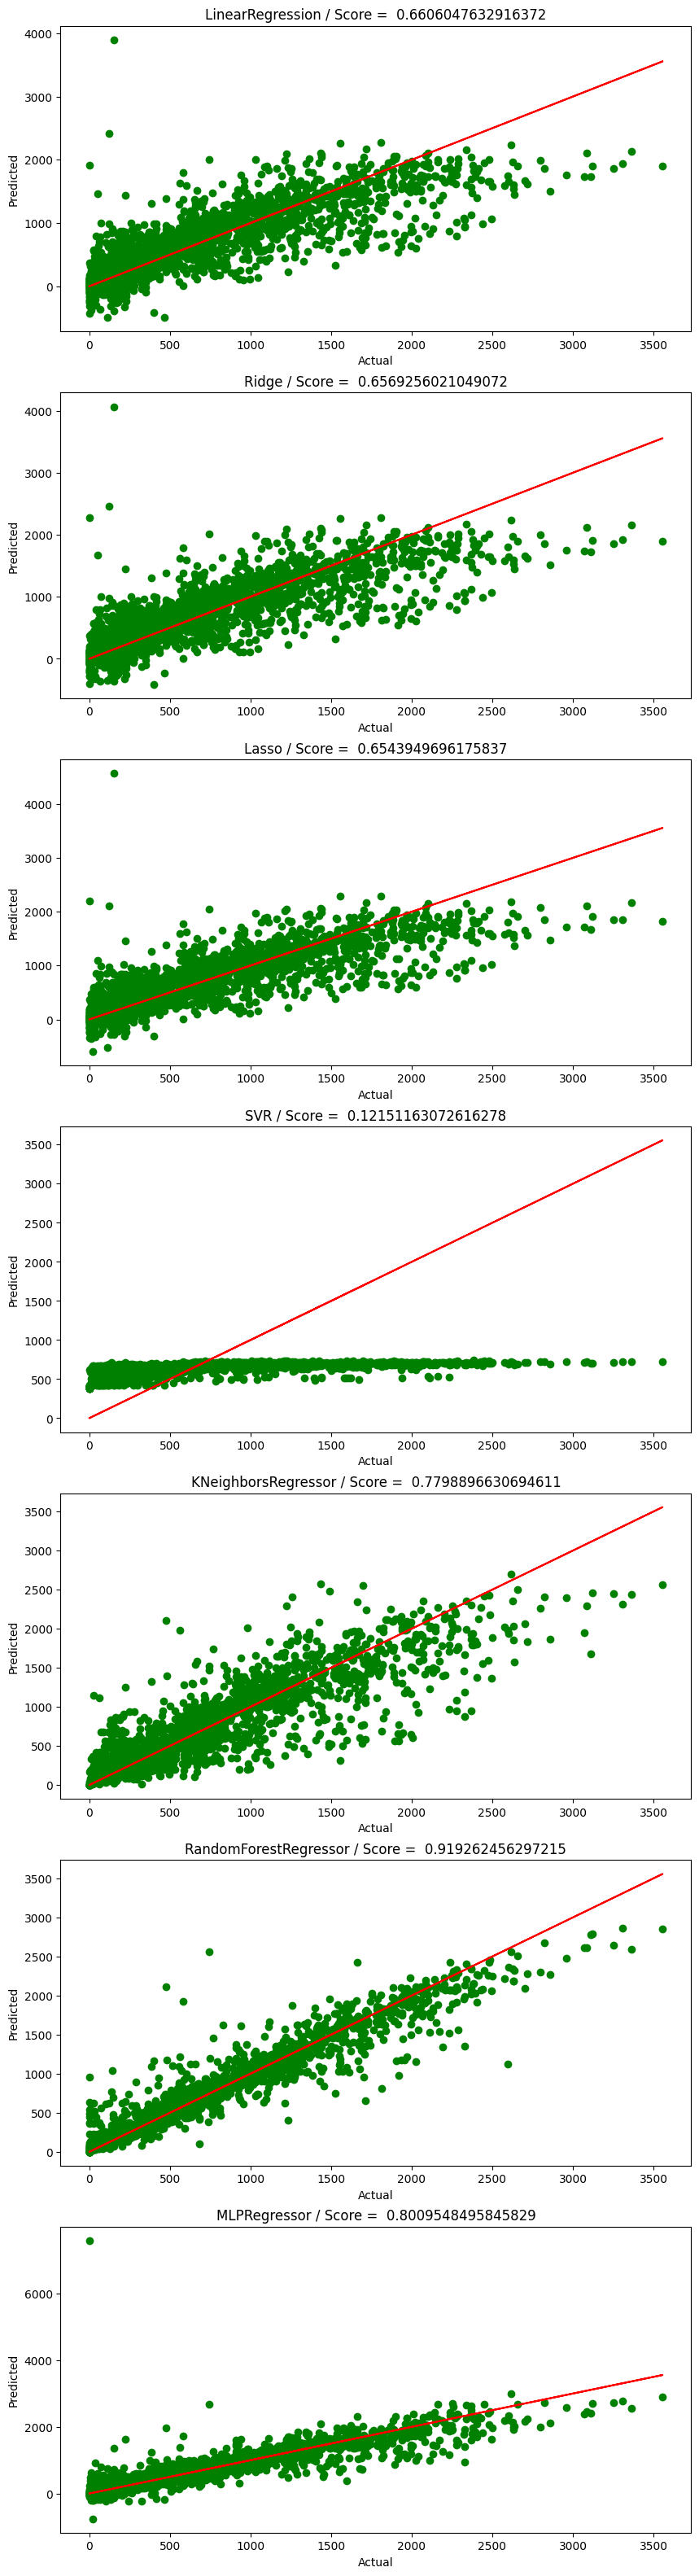

In [18]:
all_scores['with standardization and poly'] =  run(df_std_poly)

In [20]:
all_scores

,without scaling or poly,with standardization,with minmax,with poly,with standardization and poly
LinearRegression,0.520051,0.520051,0.520051,0.660487,0.660605
Ridge,0.520109,0.520056,0.522076,0.655581,0.656926
Lasso,0.520488,0.520217,0.521355,0.652932,0.654395
SVR,0.012314,0.302453,0.253076,0.008740,0.121512
KNeighborsRegressor,0.520272,0.770210,0.772245,0.493575,0.779890
RandomForestRegressor,0.922504,0.923780,0.924184,0.919637,0.919262
MLPRegressor,0.689515,0.799947,0.707091,0.491595,0.800955


<Axes: >

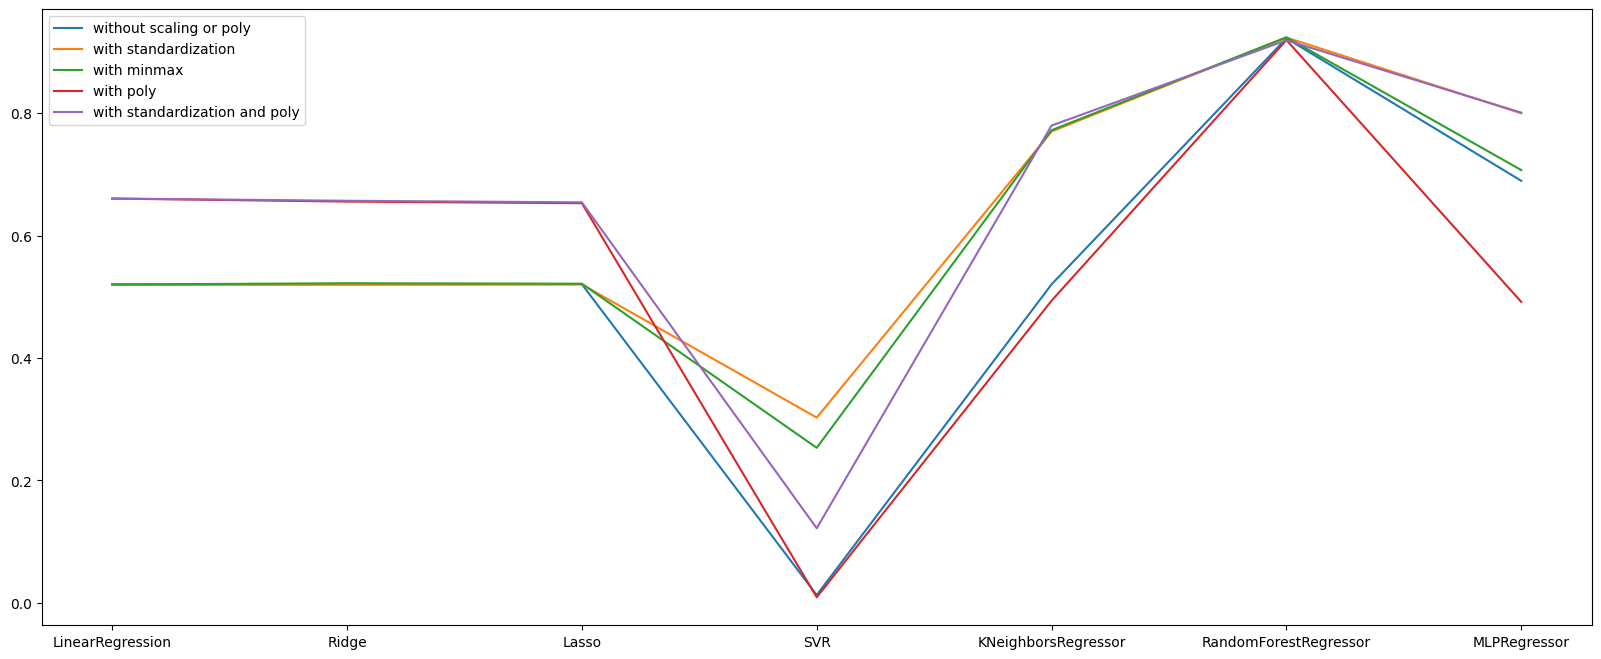

In [22]:
all_scores.plot(figsize=(20,8))

# Conclusions

We can see that, except for the RF, all models perform better when we apply feature engineering techniques. Also note that no hyperparameter tuning was performed. So, we can expect even better results if we tune the hyperparameters of each model. This would be a good exercise for you to do... but, be careful, it can be very time consuming for some models such as the MLPRegressor or SVM. 